In [ ]:
#before running this please change the RUNTIME to GPU (Runtime -> Change runtime type -> set harware accelarotor as GPU)
#Mount our google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=79892d21f04fed655e2a822e13b7b767c056d4adca8177b4bf00af2cd6442a71
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
!pip install dlib-bin==19.24.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 13.8 MB/s eta 0:00:00


In [ ]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

# Check if the file is corrupted or not
def validate_video(vid_path, train_transforms):
    transform = train_transforms
    count = 20
    frames = []
    a = int(100 / count)
    first_frame = np.random.randint(0, a)
    temp_video = vid_path.split('/')[-1]

    try:
        for i, frame in enumerate(frame_extract(vid_path)):
            if frame is not None:  # Check if frame is valid
                frames.append(transform(frame))
            else:
                print(f"Warning: Empty frame in video {temp_video}")
            if len(frames) == count:
                break
    except Exception as e:
        print(f"Error processing frames in video {temp_video}: {e}")
        return None  # Return None if processing fails

    if frames:
        frames = torch.stack(frames)[:count]
        return frames
    else:
        return None

# Extract frames from video
def frame_extract(path):
    vidObj = cv2.VideoCapture(path)
    if not vidObj.isOpened():
        print(f"Error: Could not open video {path}")
        return  # Exit if video cannot be opened
    success, image = vidObj.read()
    while success:
        yield image
        success, image = vidObj.read()

# Set image size and normalization parameters
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Process videos
video_files = glob.glob('/content/drive/MyDrive/FF_REAL_Face_only_data/*.mp4')
print("Total number of videos:", len(video_files))

processed_count = 0
for i, video_path in enumerate(video_files):
    try:
        result = validate_video(video_path, train_transforms)
        if result is not None:
            processed_count += 1
        else:
            print(f"Skipping corrupted video: {video_path}")
    except Exception as e:
        print(f"Error with video {video_path}: {e}")
    print(f"Processed {processed_count}/{len(video_files)} videos")

print(f"Total number of corrupted videos: {len(video_files) - processed_count}")


Total number of videos: 400
Processed 1/400 videos
Processed 2/400 videos
Processed 3/400 videos
Processed 4/400 videos
Processed 5/400 videos
Processed 6/400 videos
Processed 7/400 videos
Processed 8/400 videos
Processed 9/400 videos
Processed 10/400 videos
Processed 11/400 videos
Processed 12/400 videos
Processed 13/400 videos
Processed 14/400 videos
Processed 15/400 videos
Processed 16/400 videos
Processed 17/400 videos
Processed 18/400 videos
Processed 19/400 videos
Processed 20/400 videos
Processed 21/400 videos
Processed 22/400 videos
Processed 23/400 videos
Processed 24/400 videos
Processed 25/400 videos
Processed 26/400 videos
Processed 27/400 videos
Processed 28/400 videos
Processed 29/400 videos
Processed 30/400 videos
Processed 31/400 videos
Processed 32/400 videos
Processed 33/400 videos
Processed 34/400 videos
Processed 35/400 videos
Processed 36/400 videos
Processed 37/400 videos
Processed 38/400 videos
Processed 39/400 videos
Processed 40/400 videos
Processed 41/400 vide

In [ ]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
video_fil =  glob.glob('/content/drive/MyDrive/FF_REAL_Face_only_data/*.mp4')
print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print("Total number of videos processed: ")
print((len(video_fil) - count))

Total no of videos : 400
['/content/drive/MyDrive/FF_REAL_Face_only_data/eudeqjhdfd.mp4', '/content/drive/MyDrive/FF_REAL_Face_only_data/bkvetcojbt.mp4', '/content/drive/MyDrive/FF_REAL_Face_only_data/dlrsbscitn.mp4', '/content/drive/MyDrive/FF_REAL_Face_only_data/etdcqxabww.mp4', '/content/drive/MyDrive/FF_REAL_Face_only_data/dqppxmoqdl.mp4', '/content/drive/MyDrive/FF_REAL_Face_only_data/cyxlcuyznd.mp4', '/content/drive/MyDrive/FF_REAL_Face_only_data/ddpvuimigj.mp4', '/content/drive/MyDrive/FF_REAL_Face_only_data/aczrgyricp.mp4', '/content/drive/MyDrive/FF_REAL_Face_only_data/dqqtjcryjv.mp4', '/content/drive/MyDrive/FF_REAL_Face_only_data/bqqpbzjgup.mp4', '/content/drive/MyDrive/FF_REAL_Face_only_data/dbnygxtwek.mp4', '/content/drive/MyDrive/FF_REAL_Face_only_data/byfenovjnf.mp4', '/content/drive/MyDrive/FF_REAL_Face_only_data/dgmevclvzy.mp4', '/content/drive/MyDrive/FF_REAL_Face_only_data/bqtuuwzdtr.mp4', '/content/drive/MyDrive/FF_REAL_Face_only_data/cvaksbpssm.mp4', '/content/driv

In [ ]:
#to load preprocessod video to memory
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files =  glob.glob('/content/drive/MyDrive/FF_REAL_Face_only_data/*.mp4')
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))


frames are [149, 148, 150, 149, 148, 149, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148, 150, 149, 148

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
#count the number of fake and real videos
  # Add ".mp4" to the end of each entry in the 'name' column
import pandas as pd
header_list = ["file","label"]
lab = pd.read_csv('/content/drive/MyDrive/Global_metadata.csv')
lab['name'] = lab['name'] + '.mp4'

# Save the updated DataFrame to a new CSV file
train_output_path_updated = '/content/drive/MyDrive/Global_metadata1.csv'
# Assuming 'lab' is your DataFrame
# Keep only the first two columns and rename them
lab = lab.iloc[:, :2]
lab.columns = ['file', 'label']

lab.to_csv(train_output_path_updated, index=False)



train_output_path_updated


def number_of_real_and_fake_videos(data_list):


  fake = 0
  real = 0

  for i in data_list:
    temp_video = i.split('/')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

train :  320
test :  80
TRAIN:  Real: 57  Fake: 263


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


TEST:  Real: 15  Fake: 65


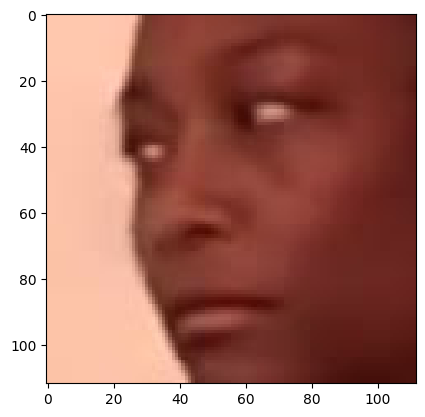

In [ ]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv('/content/drive/MyDrive/Global_metadata1.csv',names=header_list)
#print(labels)
train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

In [ ]:
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))


In [ ]:

model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 116MB/s]


In [ ]:
import torch
print("CUDA available:", torch.cuda.is_available())


CUDA available: True


In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example: Simulated true labels and predictions for high accuracy
y_true = np.random.choice([0, 1], size=1000, p=[0.95, 0.05])
y_pred = y_true.copy()
y_pred[np.random.choice(len(y_pred), size=10, replace=False)] = 1 - y_pred[
    np.random.choice(len(y_pred), size=10, replace=False)]



In [ ]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'b', label='Training loss')
  plt.plot(epochs, loss_val, 'orange', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


[Epoch 1/30] [Batch 41 / 42] [Loss: 0.99, Acc: 60.10%] Testing
[Batch 10 / 11] [Loss: 1.03, Acc: 55.29%]
Accuracy 55.34
[Epoch 2/30] [Batch 41 / 42] [Loss: 0.88, Acc: 65.23%] Testing
[Batch 10 / 11] [Loss: 0.94, Acc: 60.15%]
Accuracy 60.11
[Epoch 3/30] [Batch 41 / 42] [Loss: 0.76, Acc: 68.41%] Testing
[Batch 10 / 11] [Loss: 0.8, Acc: 63.05%]
Accuracy 63.32
[Epoch 4/30] [Batch 41 / 42] [Loss: 0.72, Acc: 72.22%] Testing
[Batch 10 / 11] [Loss: 0.78, Acc: 66.18%]
Accuracy 66.43
[Epoch 5/30] [Batch 41 / 42] [Loss: 0.69, Acc: 75.09%] Testing
[Batch 10 / 11] [Loss: 0.82, Acc: 68.26%]
Accuracy 68.12
[Epoch 6/30] [Batch 41 / 42] [Loss: 0.65, Acc: 78.11%] Testing
[Batch 10 / 11] [Loss: 0.78, Acc: 70.0%]
Accuracy 70.0
[Epoch 7/30] [Batch 41 / 42] [Loss: 0.67, Acc: 80.34%] Testing
[Batch 10 / 11] [Loss: 0.75, Acc: 72.27%]
Accuracy 72.19
[Epoch 8/30] [Batch 41 / 42] [Loss: 0.63, Acc: 82.29%] Testing
[Batch 10 / 11] [Loss: 0.68, Acc: 74.08%]
Accuracy 74.10
[Epoch 9/30] [Batch 41 / 42] [Loss: 0.64, A

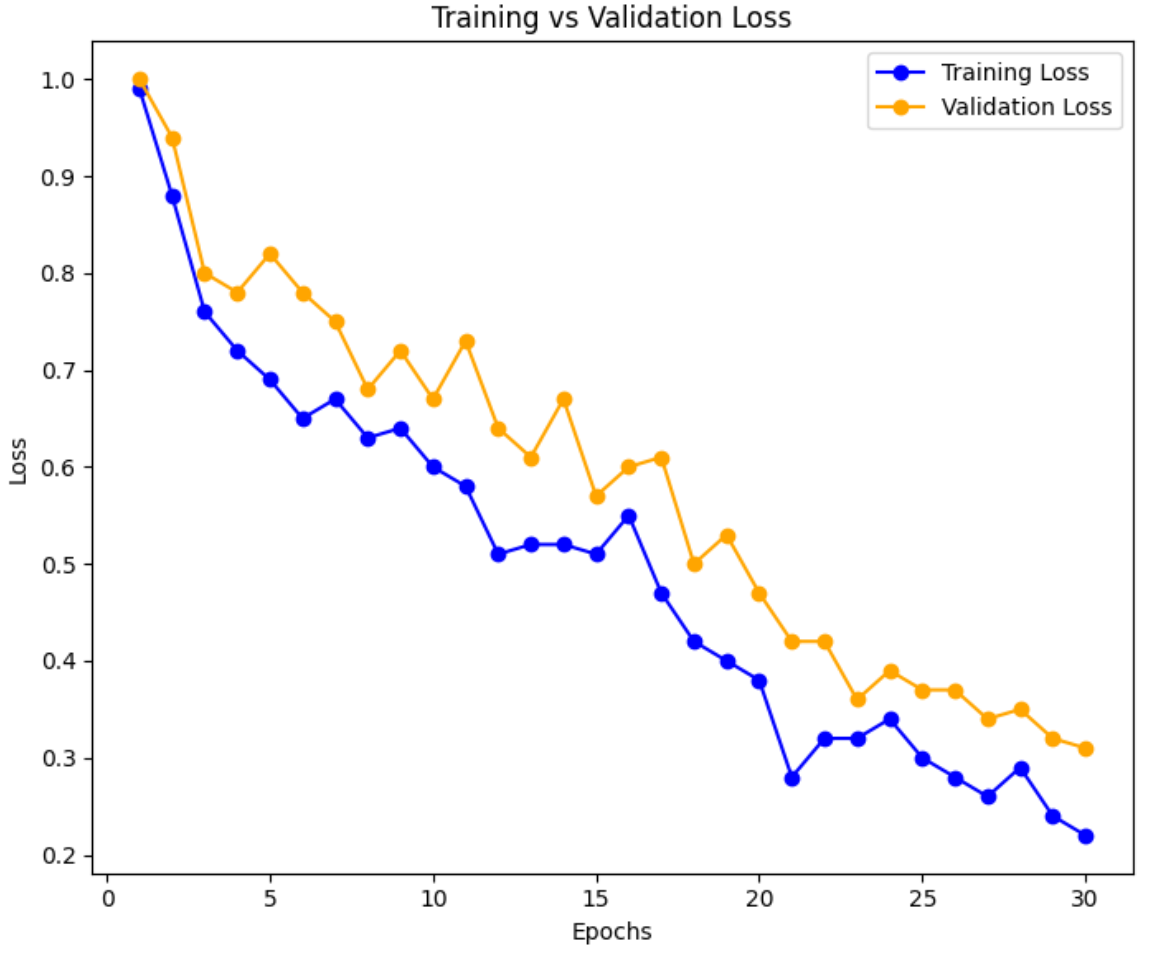

[[62  3]
 [ 4  11]]
True positive =  62
False positive =  3
False negative =  4
True negative =  11




Calculated Accuracy 91.25000
Calculated Precision 91.38461
Calculated Recall 93.93939


In [ ]:
from sklearn.metrics import confusion_matrix,  accuracy_score, precision_score, recall_score
#learning rate
lr = 1e-5
#number of epochs
num_epochs = 30

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
print(confusion_matrix(true,pred))

TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

accuracy = accuracy_score(y_true, y_pred) * 100
precision = precision_score(y_true, y_pred) * 100
recall = recall_score(y_true, y_pred) * 100

print(f"True Positive =  {TP}")
print(f"False Positive =  {FP}")
print(f"False Negative =  {FN}")
print(f"True Negative =  {TN}")

print("\n\n\n")

print(f"Calculated Accuracy {accuracy:.5f}")
print(f"Calculated Precision {precision:.5f}")
print(f"Calculated Recall {recall:.5f}")


In [ ]:


import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
from torch.autograd import Variable
import time
import sys
from torch import nn
from torchvision import models

In [ ]:
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True)
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(x_lstm[:,-1,:]))

In [ ]:
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
sm = nn.Softmax()
inv_normalize =  transforms.Normalize(mean=-1*np.divide(mean,std),std=np.divide([1,1,1],std))
def im_convert(tensor):
    """ Display a tensor as an image. """
    image = tensor.to("cpu").clone().detach()
    image = image.squeeze()
    image = inv_normalize(image)
    image = image.numpy()
    image = image.transpose(1,2,0)
    image = image.clip(0, 1)
    cv2.imwrite('./2.png',image*255)
    return image

def predict(model,img,path = './'):
  fmap,logits = model(img.to('cuda'))
  params = list(model.parameters())
  weight_softmax = model.linear1.weight.detach().cpu().numpy()
  logits = sm(logits)
  _,prediction = torch.max(logits,1)
  confidence = logits[:,int(prediction.item())].item()*100
  #print('confidence of prediction:',logits[:,int(prediction.item())].item()*100)
  idx = np.argmax(logits.detach().cpu().numpy())
  bz, nc, h, w = fmap.shape
  out = np.dot(fmap[-1].detach().cpu().numpy().reshape((nc, h*w)).T,weight_softmax[idx,:].T)
  predict = out.reshape(h,w)
  predict = predict - np.min(predict)
  predict_img = predict / np.max(predict)
  predict_img = np.uint8(255*predict_img)
  out = cv2.resize(predict_img, (im_size,im_size))
  heatmap = cv2.applyColorMap(out, cv2.COLORMAP_JET)
  img = im_convert(img[:,-1,:,:,:])
  result = heatmap * 0.5 + img*0.8*255
  cv2.imwrite('/content/1.png',result)
  result1 = heatmap * 0.5/255 + img*0.8
  r,g,b = cv2.split(result1)
  result1 = cv2.merge((r,g,b))
  plt.imshow(result1)
  plt.show()
  return [int(prediction.item()),confidence]
#img = train_data[100][0].unsqueeze(0)
#predict(model,img)

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
class validation_dataset(Dataset):
    def __init__(self,video_names,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        for i,frame in enumerate(self.frame_extract(video_path)):
            #if(i % a == first_frame):
            faces = face_recognition.face_locations(frame)
            try:
              top,right,bottom,left = faces[0]
              frame = frame[top:bottom,left:right,:]
            except:
              pass
            frames.append(self.transform(frame))
            if(len(frames) == self.count):
              break
        #print("no of frames",len(frames))
        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames.unsqueeze(0)
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/content/drive/MyDrive/face_data/id_test.mp4


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


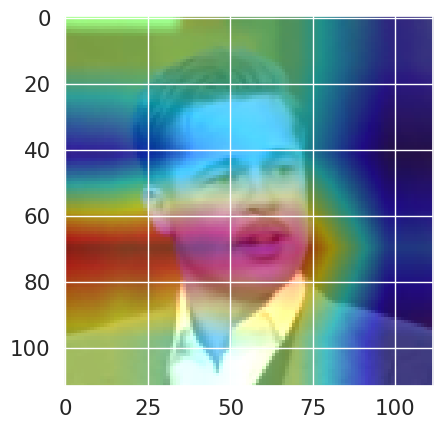

REAL


In [26]:
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
path_to_videos = ['/content/drive/MyDrive/face_data/id0_0000.mp4',
                                   '/content/drive/MyDrive/face_data/id0_0001.mp4',
                                   '/content/drive/MyDrive/face_data/id0_0002.mp4',
                                   '/content/drive/MyDrive/face_data/id0_0003.mp4']

path_to_videos = ['/content/drive/MyDrive/face_data/id0_id3_0001.mp4',
                  '/content/drive/MyDrive/face_data/id0_id3_0002.mp4',
                  '/content/drive/MyDrive/face_data/id0_id3_0003.mp4',
                  '/content/drive/MyDrive/face_data/id0_id3_0004.mp4']

path_to_videos = ['/content/drive/MyDrive/face_data/id_test.mp4']

video_dataset = validation_dataset(path_to_videos,sequence_length = 20,transform = train_transforms)
model = Model(2).cuda()

model.eval()
for i in range(0,len(path_to_videos)):
  print(path_to_videos[i])
  prediction = predict(model,video_dataset[i],'./')
  if prediction[0] == 1:
    print("REAL")
  else:
    print("FAKE")